#### Projet IF29: Détection de profils atypiques sur Twitter; comparaison entre classification supervisée et non-supervisée
#### Auteur: LATH Victor; MBANGUE Patrice; MOHAMMAD Ahamad; NEIL-JOVY Minko Bikono; NGUEMO KAMWOUA Dora Chelsy; TAKAM TALLA Vigny Brayan
#### Semestre P25_IF29

#### **Première partie:** Importation, description des données et calcul des caractéristiques

In [173]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, confusion_matrix, classification_report,
    adjusted_rand_score, silhouette_score
)

from scipy.stats import mode
from scipy.spatial import distance
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn import metrics, cluster
from sklearn.svm import SVC


In [3]:
# Import des données et lecture de l'entête
df = pd.read_csv("data_set_final_3/data_set_final_3.csv")
df.head()

,_id,user_name,user_location,user_description,user_followers_count,user_friends_count,user_statuses_count,user_created_at,user_verified,user_favourites_count,...,likes_per_day,ratio_followers_friends,percent_retweets,avg_hashtags_per_tweet,avg_mentions_per_tweet,avg_urls_per_tweet,sensitive_tweet_ratio,has_description,has_location,user_account_age_days
0,418,dens,NYC / Kingston,"I like to build things (Founder @Foursquare 📱,...",87890,2486,66601,2006-07-05 19:52:46,True,13485,...,1.952650,35.353982,0.0,1.0,0.666667,0.5,0.0,True,True,6906
1,730,crutis,NaN,I am what I tweet,621,191,12159,2006-07-14 01:15:50,False,3164,...,0.458684,3.251309,0.0,0.0,1.000000,0.0,0.0,True,False,6898
2,761,RodBegbie,"San Francisco, CA",Engineering Manager on @Dropbox Paper • Pronou...,4562,483,29724,2006-07-14 04:56:28,False,46254,...,6.705422,9.445135,0.0,0.0,0.000000,1.0,0.0,True,True,6898
3,885,Ross,"Palo Alto, CA",Husband and Father. Pingpad CEO and cofounder....,21491,1099,13879,2006-07-14 15:12:42,True,6091,...,0.883138,19.555050,0.0,1.0,0.000000,0.0,0.0,True,True,6897
4,922,Holger,San Francisco,partnerships @google previously @postmates @fo...,4399,934,11717,2006-07-14 17:59:15,False,12046,...,1.746556,4.709850,0.0,3.0,1.000000,0.0,0.0,True,True,6897


## Description des variables

#### Identifiants et Informations de Profil

- **_id** : Identifiant unique de chaque utilisateur.  
- **user_name** : Nom d'utilisateur (pseudo Twitter).  
- **user_location** : Localisation renseignée par l’utilisateur (champ libre).  
- **user_description** : Bio du profil utilisateur.  
- **user_created_at** : Date de création du compte utilisateur.  
- **user_verified** : Indique si le compte est vérifié.  
- **user_lang** : Langue définie sur le compte utilisateur.  
- **user_source** : Plateforme utilisée pour publier les tweets (par ex. web, iPhone, Android).

#### Statistiques du Compte Utilisateur

- **user_followers_count** : Nombre d’abonnés.  
- **user_friends_count** : Nombre de comptes suivis.  
- **user_statuses_count** : Nombre total de tweets postés.  
- **user_favourites_count** : Nombre total de tweets aimés.  
- **user_listed_count** : Nombre de fois que l’utilisateur a été ajouté à une liste.  
- **user_default_profile** : Indique si l’utilisateur utilise le profil par défaut.  
- **user_default_profile_image** : Indique si l’utilisateur utilise l’image de profil par défaut.  

#### Statistiques sur les Tweets

- **tweets** : Liste ou contenu des tweets postés.  
- **total_tweets** : Nombre total de tweets collectés.  
- **total_retweets** : Nombre total de retweets obtenus.  
- **total_favorites** : Nombre total de likes reçus.  
- **total_retweeted_tweets** : Nombre de tweets qui sont des retweets d’autres comptes.  
- **total_sensitive_tweets** : Nombre de tweets marqués comme sensibles.  
- **total_tweets_with_url** : Nombre de tweets contenant une URL.  
- **total_hashtags** : Nombre total de hashtags utilisés.  
- **total_mentions** : Nombre total de mentions d'autres utilisateurs.

#### Indicateurs Moyens et Ratios

- **user_account_age** : Âge du compte en années.  
- **user_account_age_days** : Âge du compte en jours.  
- **avg_tweets_per_day** : Moyenne de tweets publiés par jour.  
- **avg_retweets_per_tweet** : Moyenne de retweets par tweet.  
- **avg_favorites_per_tweet** : Moyenne de likes par tweet.  
- **likes_per_day** : Moyenne de likes reçus par jour.  
- **ratio_followers_friends** : Rapport entre abonnés et abonnements.  
- **percent_retweets** : Pourcentage de tweets qui sont des retweets.  
- **avg_hashtags_per_tweet** : Moyenne de hashtags utilisés par tweet.  
- **avg_mentions_per_tweet** : Moyenne de mentions par tweet.  
- **avg_urls_per_tweet** : Moyenne d’URLs par tweet.  
- **sensitive_tweet_ratio** : Proportion de tweets marqués comme sensibles.

#### Variables Dérivées (Booléennes)

- **has_description** : Indique si l’utilisateur a une bio.  
- **has_location** : Indique si l’utilisateur a renseigné sa localisation.  


## Calcul des Nouvelles Caractéristiques 

#####  `degree_agressiv`
- **Description** : Indicateur d’activité intense sur Twitter, basé sur le volume de tweets et d'abonnements rapporté à l'âge du compte.
- **Formule** :  
  `(((user_statuses_count / user_account_age_days) + (user_friends_count / user_account_age_days)) * 3600 * 24) / 350`


######  `follow_friends_ratio`
- **Description** : Rapport entre le nombre d’abonnés et le nombre de comptes suivis.
- **Interprétation** : Un ratio élevé peut suggérer une forte influence ou popularité.


######  `friends_follow_ratio`
- **Description** : Rapport entre le nombre de comptes suivis et le nombre d’abonnés.
- **Interprétation** : Un ratio élevé peut indiquer un comportement de suiveur; de compte peu influent et peut etre suspect.


######  `visibility`
- **Description** : Score de visibilité basé sur la fréquence d’utilisation des mentions et hashtags dans les tweets.
- **Formule** :  
  `((user_mentions_count / user_tweets_count) * 11.4 + (user_hashtags_count / user_tweets_count) * 11.6) / 140`


In [4]:
# 1. Calcul de degree_agressiv
def calcul_degree_agressiv(row):
    if row["user_account_age_days"] == 0:
        return 0
    return (((row["user_statuses_count"] / row["user_account_age_days"]) +
             (row["user_friends_count"] / row["user_account_age_days"])) * 3600 * 24) / 350

# 2. Calcul des ratios followers/friends
def calcul_follow_friends_ratio(row):
    return row["user_followers_count"] / row["user_friends_count"] if row["user_friends_count"] != 0 else 0

def calcul_friends_follow_ratio(row):
    return row["user_friends_count"] / row["user_followers_count"] if row["user_followers_count"] != 0 else 0

# 3. Calcul de visibility
def calcul_visibility(row):
    if row["total_tweets"] == 0:
        return 0
    return ((row["total_mentions"] / row["total_tweets"]) * 11.4 +
            (row["total_hashtags"] / row["total_tweets"]) * 11.6) / 140

# 5. Application au DataFrame df
df["degree_agressiv"] = df.apply(calcul_degree_agressiv, axis=1)
df["follow_friends_ratio"] = df.apply(calcul_follow_friends_ratio, axis=1)
df["friends_follow_ratio"] = df.apply(calcul_friends_follow_ratio, axis=1)
df["visibility"] = df.apply(calcul_visibility, axis=1)


#### **Deuxieme partie:** Analyse desciptive et prétraitement des données 

#### - Analyse descriptive

In [5]:
# Description des données
df.describe()

,_id,user_followers_count,user_friends_count,user_statuses_count,user_favourites_count,user_listed_count,total_tweets,total_retweets,total_favorites,total_retweeted_tweets,...,percent_retweets,avg_hashtags_per_tweet,avg_mentions_per_tweet,avg_urls_per_tweet,sensitive_tweet_ratio,user_account_age_days,degree_agressiv,follow_friends_ratio,friends_follow_ratio,visibility
count,1.837300e+06,1.837300e+06,1.837300e+06,1.837300e+06,1.837300e+06,1.837300e+06,1.837300e+06,1837300.0,1837300.0,1837300.0,...,1837300.0,1.837300e+06,1.837300e+06,1.837300e+06,1.837300e+06,1.837300e+06,1.837300e+06,1.837300e+06,1.837300e+06,1.837300e+06
mean,2.278436e+17,3.605581e+03,8.699081e+02,1.767935e+04,8.745599e+03,2.442826e+01,2.476138e+00,0.0,0.0,0.0,...,0.0,1.486803e+00,9.076249e-01,2.752379e-01,9.346320e-03,4.276231e+03,9.931816e+02,5.503675e+01,2.738097e+00,1.970989e-01
std,3.887919e+17,1.187072e+05,4.878117e+03,4.050653e+04,2.202914e+04,3.983562e+02,9.269885e+00,0.0,0.0,0.0,...,0.0,1.416617e+00,6.850095e-01,4.121320e-01,9.092639e-02,1.038590e+03,2.128873e+03,1.042729e+04,7.303597e+00,1.321022e-01
min,4.180000e+02,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.541000e+03,4.481793e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.034977e+08,1.030000e+02,1.670000e+02,1.101000e+03,4.410000e+02,0.000000e+00,1.000000e+00,0.0,0.0,0.0,...,0.0,5.000000e-01,5.238095e-01,0.000000e+00,0.000000e+00,3.357000e+03,9.733567e+01,3.611111e-01,6.923077e-01,8.285714e-02
50%,1.462313e+09,2.980000e+02,3.570000e+02,5.201000e+03,2.158000e+03,2.000000e+00,1.000000e+00,0.0,0.0,0.0,...,0.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.384000e+03,3.415964e+02,8.089888e-01,1.195301e+00,1.642857e-01
75%,7.128113e+17,7.530000e+02,7.580000e+02,1.788400e+04,7.911000e+03,8.000000e+00,2.000000e+00,0.0,0.0,0.0,...,0.0,2.000000e+00,1.000000e+00,5.000000e-01,0.000000e+00,5.124000e+03,1.031833e+03,1.394885e+00,2.640000e+00,2.471429e-01
max,1.008390e+18,4.219805e+07,1.569366e+06,8.898257e+06,1.718515e+06,1.953890e+05,7.122000e+03,0.0,0.0,0.0,...,0.0,2.500000e+01,1.200000e+01,1.000000e+00,1.000000e+00,2.024100e+04,3.701193e+05,9.718083e+06,1.695000e+03,2.152857e+00


In [7]:
# Taille du dataset
df.shape

(1837300, 42)

In [21]:
# Pourcentage de valeurs manquantes par colonne
(df.isna().sum() / len(df)) * 100

_id                            0.000000
user_name                      0.000054
user_location                 29.288739
user_description              17.127960
user_followers_count           0.000000
user_friends_count             0.000000
user_statuses_count            0.000000
user_created_at                0.000000
user_verified                  0.000000
user_favourites_count          0.000000
user_default_profile           0.000000
user_default_profile_image     0.000000
user_listed_count              0.000000
user_lang                      0.000000
user_source                    0.000000
tweets                         0.000000
total_tweets                   0.000000
total_retweets                 0.000000
total_favorites                0.000000
total_retweeted_tweets         0.000000
total_sensitive_tweets         0.000000
total_tweets_with_url          0.000000
total_hashtags                 0.000000
total_mentions                 0.000000
user_account_age               0.000000


**Interpretation:** L’analyse des valeurs manquantes montre que la plupart des colonnes de df sont complètes, notamment celles générées automatiquement par Twitter (followers, tweets, création de compte). En revanche, certaines variables comme user_location ou user_description, saisies manuellement par les utilisateurs, présentent un taux de valeurs manquantes plus élevé. 

In [8]:
#type des données
df.dtypes

_id                             int64
user_name                      object
user_location                  object
user_description               object
user_followers_count            int64
user_friends_count              int64
user_statuses_count             int64
user_created_at                object
user_verified                    bool
user_favourites_count           int64
user_default_profile             bool
user_default_profile_image       bool
user_listed_count               int64
user_lang                      object
user_source                    object
tweets                         object
total_tweets                    int64
total_retweets                  int64
total_favorites                 int64
total_retweeted_tweets          int64
total_sensitive_tweets          int64
total_tweets_with_url           int64
total_hashtags                  int64
total_mentions                  int64
user_account_age              float64
avg_tweets_per_day            float64
avg_retweets

#### - Visualisation des donnés

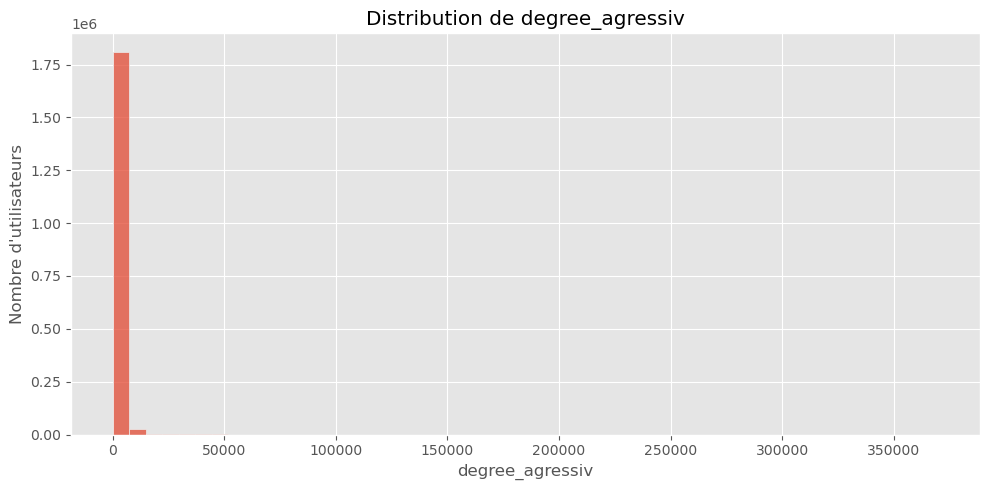

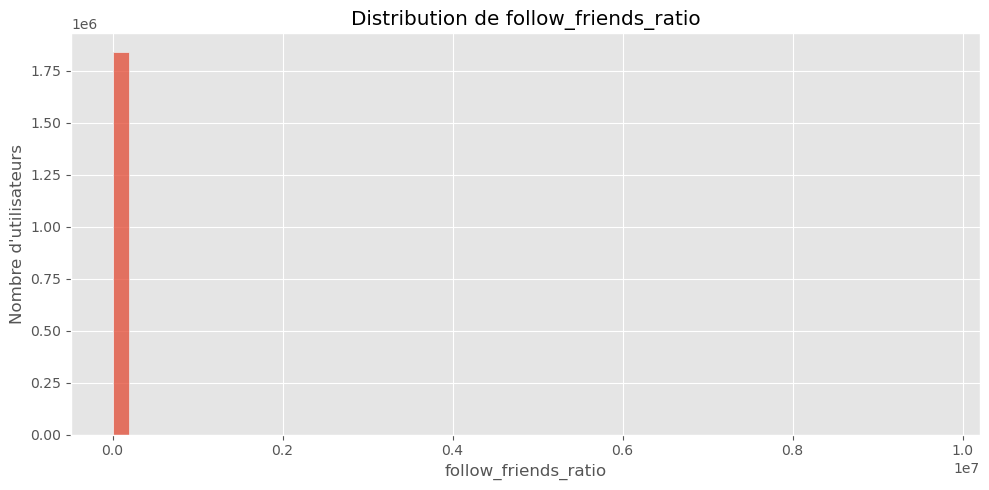

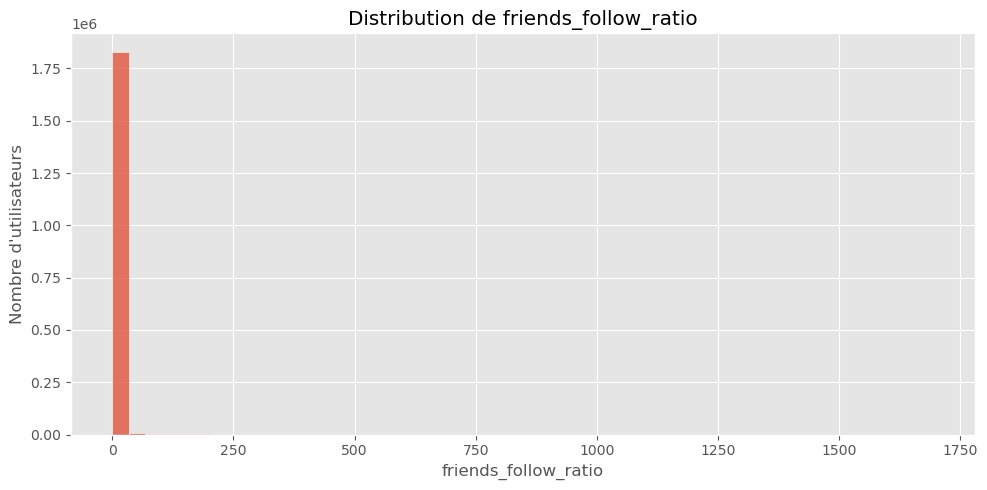

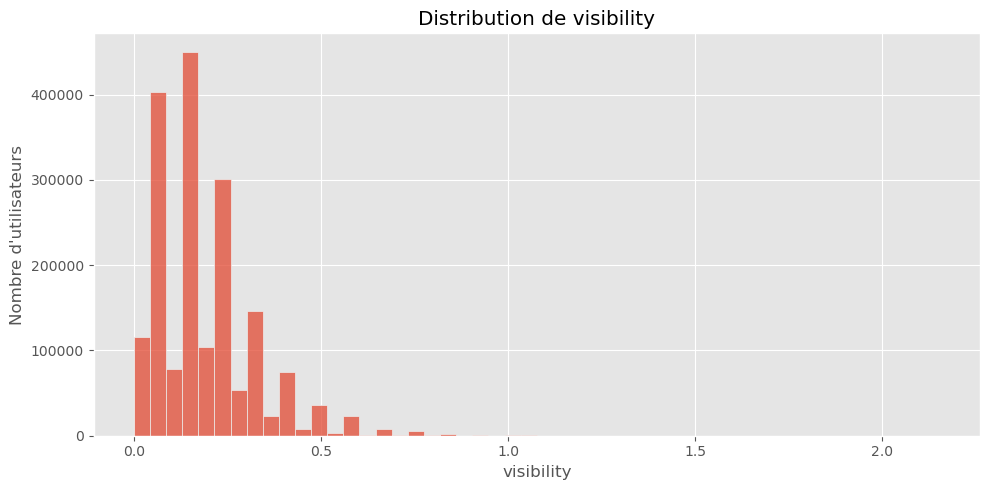

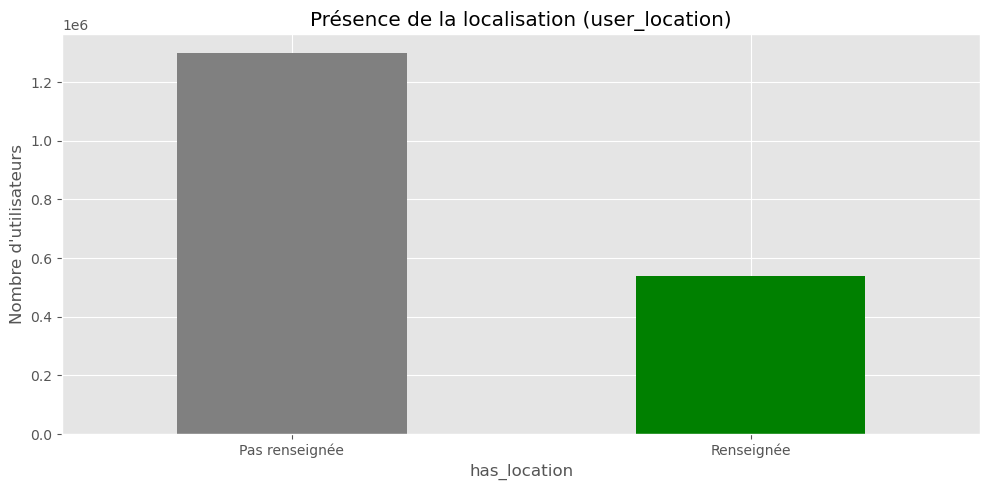

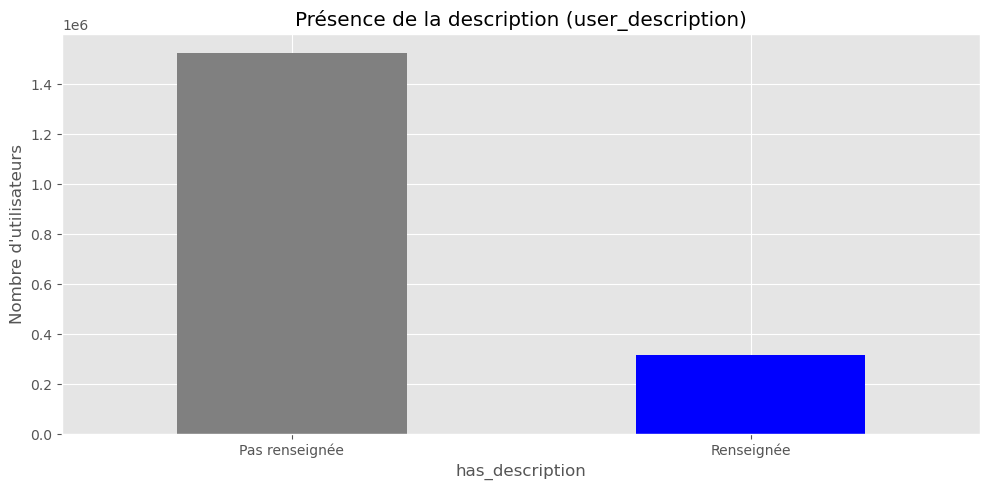

In [9]:
# Affichage inline 
%matplotlib inline

# Configuration visuelle
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

# === 1. Variables numériques utiles : histogrammes ===
variables_numeriques = [
    'degree_agressiv',
    'follow_friends_ratio', 'friends_follow_ratio',
    'visibility'
]

for var in variables_numeriques:
    if var in df.columns:
        plt.figure()
        sns.histplot(df[var].dropna(), bins=50, kde=False)
        plt.title(f'Distribution de {var}')
        plt.xlabel(var)
        plt.ylabel('Nombre d\'utilisateurs')
        plt.tight_layout()
        plt.show()

# === 2. Variables textuelles booléennes : barplots ===
# user_location et user_description : présence ou non (booléen)
df['has_location'] = df['user_location'].notna() & (df['user_location'].astype(str).str.strip() != '')
df['has_description'] = df['user_description'].notna() & (df['user_description'].astype(str).str.strip() != '')

plt.figure()
df['has_location'].value_counts().plot(kind='bar', color=['gray', 'green'])
plt.xticks(ticks=[0, 1], labels=["Pas renseignée", "Renseignée"], rotation=0)
plt.title("Présence de la localisation (user_location)")
plt.ylabel("Nombre d'utilisateurs")
plt.tight_layout()
plt.show()

plt.figure()
df['has_description'].value_counts().plot(kind='bar', color=['gray', 'blue'])
plt.xticks(ticks=[0, 1], labels=["Pas renseignée", "Renseignée"], rotation=0)
plt.title("Présence de la description (user_description)")
plt.ylabel("Nombre d'utilisateurs")
plt.tight_layout()
plt.show()


**Interpretation:** 

- Le graphique de degree_agressiv montre une concentration massive des utilisateurs autour de très faibles niveaux d’activité, avec un pic proche de zéro. Quelques cas isolés présentent des valeurs extrêmement élevées, ce qui traduit un comportement hyperactif inhabituel. Cette distribution très asymétrique suggère que seuls quelques utilisateurs sont anormalement agressifs, potentiellement suspects ou automatisés. 

- Le graphique montre que la visibilité des utilisateurs est fortement concentrée autour de faibles valeurs, avec un pic entre 0.1 et 0.2. Très peu d’utilisateurs dépassent une visibilité de 0.5, et au-delà de 1, la fréquence devient négligeable. Cela indique que la majorité des comptes ont peu d’interactions visibles (peu de hashtags/mentions), tandis qu’une minorité très réduite domine la visibilité.

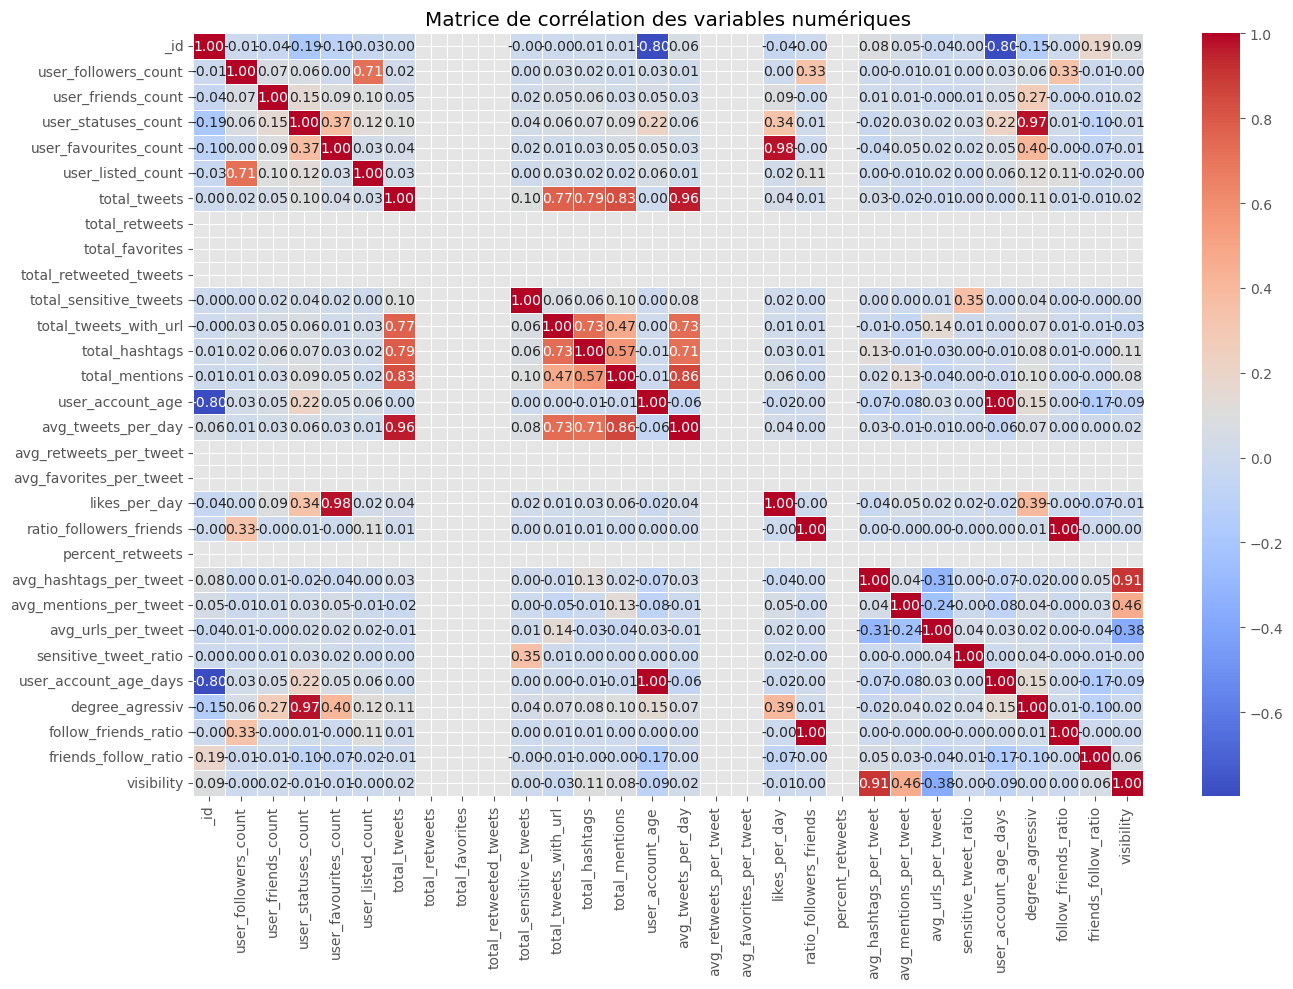

In [10]:
#Sélection des colonnes numériques
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Calcul de la matrice de corrélation
correlation_matrix = df_numeric.corr()

# Affichage de la heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation des variables numériques")
plt.tight_layout()
plt.show()

**Interpretation:** La heatmap révèle de fortes corrélations entre l’activité globale et l’activité moyenne, notamment entre `total_tweets` et `avg_tweets_per_day` ou `total_favorites` et `avg_favorites_per_tweet`. La visibilité est principalement expliquée par l’usage des hashtags et mentions. Certaines variables sont redondantes, comme `user_account_age` et `user_account_age_days`. `degree_agressiv` est modérément lié à l’intensité d’activité mais négativement corrélé à l’ancienneté, suggérant des comportements plus agressifs chez les comptes récents. Ces corrélations confirment la cohérence des indicateurs calculés.


#### - Traitement des donnés

**Traitement des valeurs manquantes de user_location et user_description**

In [11]:
# 1. Calcul du mode
location_mode = df['user_location'].mode(dropna=True)[0]
description_mode = df['user_description'].mode(dropna=True)[0]

# 2. Pourcentage de représentativité (nb d'occurrences du mode / nb total d'observations non nulles)
location_count = df['user_location'].value_counts(dropna=True)[location_mode]
description_count = df['user_description'].value_counts(dropna=True)[description_mode]

location_percentage = (location_count / df['user_location'].notna().sum()) * 100
description_percentage = (description_count / df['user_description'].notna().sum()) * 100

# 3. Affichage des résultats
print(f"Mode de user_location : '{location_mode}' ({location_percentage:.2f}%) des valeurs non nulles")
print(f"Mode de user_description : '{description_mode}' ({description_percentage:.2f}%) des valeurs non nulles")

Mode de user_location : 'Lagos, Nigeria' (0.88%) des valeurs non nulles
Mode de user_description : '.' (0.07%) des valeurs non nulles


**Interpretation:** Le mode de user_location est "Lagos, Nigeria", mais avec seulement 0,88 % des valeurs non nulles, ce qui indique une très grande diversité géographique dans les profils. Le mode de user_description est simplement un point ".", utilisé par 0,07 % des utilisateurs, révélant que la majorité des descriptions sont uniques ou très peu récurrentes. Ces faibles taux suggèrent que ni user_location ni user_description ne peuvent être résumées efficacement par leur mode, et que les valeurs manquantes devraient plutôt être remplacées par une étiquette générique comme "non renseignée"

In [12]:
# Remplacement des valeurs manquantes par "non renseignée"
df['user_location'] = df['user_location'].fillna('non renseignée')
df['user_description'] = df['user_description'].fillna('non renseignée')

**Vérification et traitement de valeurs extrèmes en utilisant la distance de Mahalanobis**


La distance de Mahalanobis est une mesure qui permet d’identifier **combien une observation est éloignée du "centre" d’un nuage de points**, en tenant compte des **corrélations entre les variables**.

Contrairement à la distance euclidienne (qui traite toutes les dimensions comme indépendantes), la distance de Mahalanobis :

- Prend en compte la **structure globale des données** (leur **variance** et **covariance**).
- Permet de **détecter les valeurs extrêmes (outliers multivariés)** qui sont éloignées de la distribution normale des observations.


In [20]:
# 1. Sélection des variables numériques
df_numeric = df.select_dtypes(include=['int64', 'float64']).dropna()

# 2. Calcul
X = df_numeric.values
mean_vector = np.mean(X, axis=0)
cov_matrix = np.cov(X, rowvar=False)

# Utiliser la pseudo-inverse (plus stable)
inv_cov_matrix = np.linalg.pinv(cov_matrix)

# 3. Calcul des distances de Mahalanobis
mahalanobis_distances = []
for i in range(X.shape[0]):
    diff = X[i] - mean_vector
    m_dist = np.sqrt(np.dot(np.dot(diff, inv_cov_matrix), diff.T))
    mahalanobis_distances.append(m_dist)

# 4. Retour propre des résultats
df_mahalanobis = df_numeric.copy()
df_mahalanobis["mahalanobis_distance"] = mahalanobis_distances

# 5. Affichage
df_mahalanobis.head()

,_id,user_followers_count,user_friends_count,user_statuses_count,user_favourites_count,user_listed_count,total_tweets,total_retweets,total_favorites,total_retweeted_tweets,...,avg_hashtags_per_tweet,avg_mentions_per_tweet,avg_urls_per_tweet,sensitive_tweet_ratio,user_account_age_days,degree_agressiv,follow_friends_ratio,friends_follow_ratio,visibility,mahalanobis_distance
0,418,87890,2486,66601,13485,4536,6,0,0,0,...,1.0,0.666667,0.5,0.0,6906,2469.536552,35.353982,0.028285,0.137143,0.58603
1,730,621,191,12159,3164,20,1,0,0,0,...,0.0,1.000000,0.0,0.0,6898,441.966616,3.251309,0.307568,0.081429,0.58603
2,761,4562,483,29724,46254,188,1,0,0,0,...,0.0,0.000000,1.0,0.0,6898,1081.010976,9.445135,0.105875,0.000000,0.58603
3,885,21491,1099,13879,6091,1883,1,0,0,0,...,1.0,0.000000,0.0,0.0,6897,536.091965,19.555050,0.051138,0.082857,0.58603
4,922,4399,934,11717,12046,268,1,0,0,0,...,3.0,1.000000,0.0,0.0,6897,452.804076,4.709850,0.212321,0.330000,0.58603


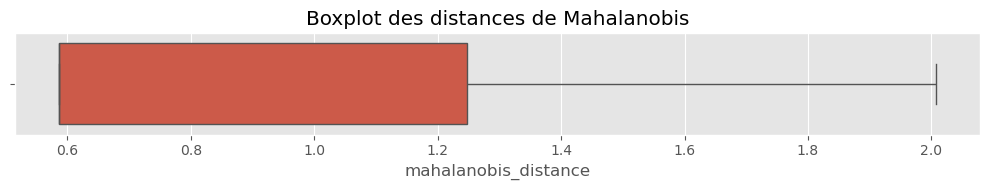

In [22]:
# 3. Boxplot pour repérer visuellement les outliers de la distance qu'on a calculé
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_mahalanobis["mahalanobis_distance"])
plt.title("Boxplot des distances de Mahalanobis")
plt.tight_layout()
plt.show()

**Interpretation:** Le boxplot des distances de Mahalanobis montre une distribution compacte et régulière, avec des distances variant principalement entre 0.6 et 2.0. Il n’y a aucun point individuel hors des moustaches, ce qui indique l’absence d’outliers multivariés significatifs dans les données. L’ensemble des observations semble donc cohérent et homogène par rapport à la structure globale du dataset. Aucune suppression ou correction n'est nécessaire à ce stade.

#### **Troisieme partie:** Methode de labelisation des données et analyse

##### Définition du profil suspect à partir des caractéristiques utilisateurs

Pour identifier si un utilisateur est suspect, nous nous basons sur des comportements anormaux fréquemment associés à des comptes automatisés ou malveillants. Un utilisateur sera considéré comme suspect (`profil = 1`) s’il satisfait **au moins un** des critères suivants :

- **Profil non personnalisé** : l’utilisateur conserve la photo de profil ou le thème par défaut (`user_default_profile_image` ou `user_default_profile` à `True`), ce qui est typique des faux comptes.
- **Activité anormalement élevée** : un `degree_agressiv` supérieur au **95e percentile** reflète une activité intense disproportionnée par rapport à l’âge du compte.
- **Ratio d’abonnements déséquilibré** : un `friends_follow_ratio` supérieur à **10** indique un comportement de suiveur massif, et un `ratio_followers_friends` inférieur à **0.1** reflète un manque d’intérêt des autres utilisateurs.
- **Contenus sensibles** : un `sensitive_tweet_ratio` supérieur à **0.5** révèle une production importante de contenus potentiellement choquants.
- **Spamming** : une moyenne supérieure à **1 lien par tweet** (`avg_urls_per_tweet > 1`) suggère une diffusion excessive de liens, typique des spams.
- **Profil incomplet** : l’absence de bio ou de localisation (`has_description` ou `has_location` à `False`) est également un signe de compte peu fiable.
- **Compte non vérifié mais hyperactif** : lorsqu’un utilisateur non vérifié dépasse le **95e percentile** en `avg_tweets_per_day`, cela peut révéler un automate ou un usage anormal.

Ces règles sont conçues pour détecter des comportements atypiques à partir de seuils empiriques ou statistiques (percentiles), tout en s’appuyant sur des indicateurs sémantiques (contenu, réseau, visibilité, complétude de profil).

**Ce data set est contenu dans le data_set_final_3/data_set_labelisé**


**Analyse du dataset labelisé**

In [ ]:
#Import du dataset et en tete
df_labelisé = pd.read_csv("data_set_final_3/data_set_labelisé.csv")
df.head()

In [38]:
# Taille du data set
df_labelisé.shape

(600000, 43)

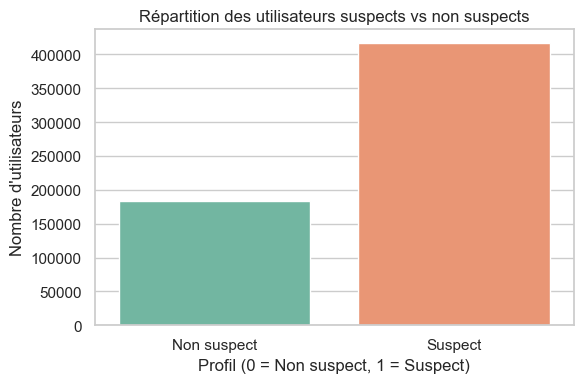

In [39]:
# visualisation la répartition des utilisateurs suspects (profil = 1) et non suspects (profil = 0) 

# Style de base
sns.set(style="whitegrid")

# Création d'un DataFrame de comptage
plot_df_labelisé = sample_df['profil'].value_counts().reset_index()
plot_df_labelisé.columns = ['profil', 'count']

# Affichage
plt.figure(figsize=(6, 4))
sns.barplot(data=plot_df, x='profil', y='count', hue='profil', palette='Set2', legend=False)

plt.title("Répartition des utilisateurs suspects vs non suspects")
plt.xlabel("Profil (0 = Non suspect, 1 = Suspect)")
plt.ylabel("Nombre d'utilisateurs")
plt.xticks([0, 1], ["Non suspect", "Suspect"])
plt.tight_layout()
plt.show()

**Interpretation:** Le graphique montre que, parmi les 600 000 utilisateurs échantillonnés, environ 70 % sont classés comme suspects (profil = 1) selon les critères comportementaux définis, tandis qu’environ 30 % sont jugés non suspects (profil = 0).

#### **Quatrieme partie:** ACP pour la reduction de la dimensions et dataset_final (Celui qui utilise les composantes principales)

L’analyse de la matrice de corrélation montre que plusieurs variables du dataset sont fortement corrélées entre elles, comme `total_tweets` et `avg_tweets_per_day`, ou encore `total_favorites` et `avg_favorites_per_tweet`. Ces redondances indiquent que certaines dimensions du jeu de données **contiennent des informations similaires**, ce qui peut entraîner une **sur-représentation de certains comportements** dans les analyses ou les modèles.

L'**Analyse en Composantes Principales (ACP)** permettrait donc de **réduire la dimensionnalité** tout en conservant l’essentiel de l'information, en regroupant ces variables corrélées en **composantes indépendantes**. Cela facilite la **visualisation des données**, améliore la **performance des algorithmes de classification ou clustering**, et limite le **bruit** ou la redondance.


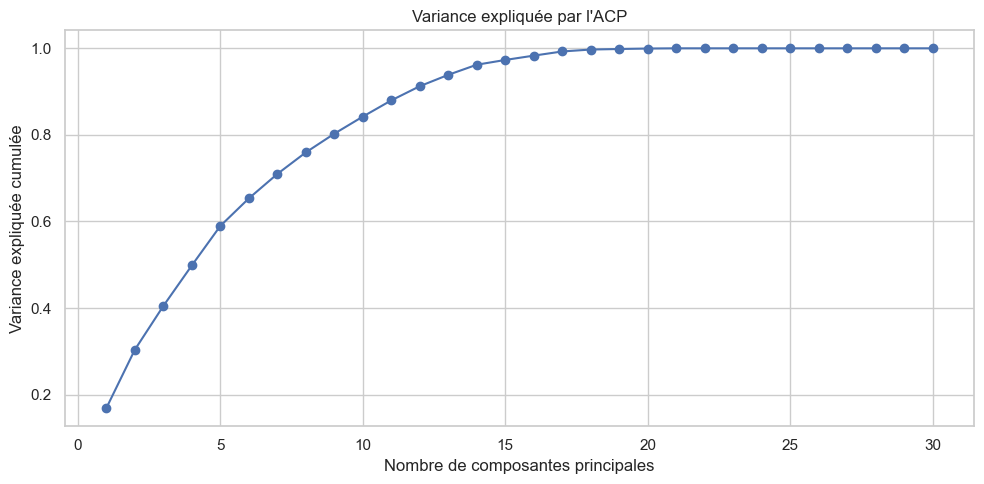

In [107]:
# 1. Sélection des variables numériques (hors variable cible)
numeric_cols = df_labelisé.select_dtypes(include=['int64', 'float64']).columns.drop('profil','_id')
X_numeric = df_labelisé[numeric_cols].dropna()  

# 2. Centrage et réduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# 3. ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. Affichage de la variance expliquée cumulée
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# 5. Visualisation du coude
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.title("Variance expliquée par l'ACP")
plt.grid(True)
plt.tight_layout()
plt.show()

In [108]:
# Trouver le nombre minimal de composantes pour atteindre au moins 80 % de variance
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1

# 6. Affichage
print(f"Nombre de composantes principales à conserver pour expliquer au moins 80% de la variance : {n_components_80}")

Nombre de composantes principales à conserver pour expliquer au moins 80% de la variance : 9


In [109]:
# Construction du dataset

# 4. Garder les 9 premières composantes
X_pca_9 = X_pca[:, :9]
df_pca = pd.DataFrame(X_pca_9, columns=[f'PC{i+1}' for i in range(9)])

# 5. Encoder les variables catégorielles utiles
categorical_cols = df_labelisé.select_dtypes(include=['object', 'bool']).columns
cols_to_exclude = ['user_name', 'tweets', 'user_created_at', 'user_description', 'user_location']
categorical_cols = [col for col in categorical_cols if col not in cols_to_exclude]

# Label encoding
label_encoder = LabelEncoder()
df_encoded = df_labelisé[categorical_cols].copy()
for col in df_encoded.columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

# 6. Fusion ACP + variables catégorielles encodées
dataset_final = pd.concat([df_pca.reset_index(drop=True), df_encoded.reset_index(drop=True)], axis=1)

# 7. Réintégration de la variable cible 'profil'
dataset_final['profil'] = df_labelisé.loc[dataset_final.index, 'profil'].values


In [110]:
dataset_final.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,user_verified,user_default_profile,user_default_profile_image,user_lang,user_source,has_description,has_location,profil
0,-0.661806,-2.201375,0.643553,0.169014,-0.952429,0.176275,-0.068571,0.274121,0.452995,0,0,0,11,463,1,1,0
1,-0.315005,-1.388026,0.946321,0.082893,1.990115,0.015225,-0.020593,-0.075110,0.658095,0,1,0,11,1040,1,1,1
2,1.632998,1.281758,2.007983,-0.637870,-0.645264,-0.795871,-0.488060,-1.927208,-0.422796,0,1,0,11,463,1,1,1
3,-0.783723,-0.346510,-0.905168,0.104132,-0.595040,0.014996,-0.107513,0.020217,-0.447400,0,1,0,11,463,1,1,1
4,-0.654950,0.681109,-1.661147,0.044410,-1.000274,-0.038997,-0.078354,-0.128641,0.310489,0,0,0,11,463,0,0,1


In [128]:
dataset_final.shape

(600000, 17)

#### **Cinquième partie:** Modelisation 
##### **Apprentissage supervisé: SVM (Support Vector Machine)**

Dans notre contexte, le **SVM** est un bon candidat pour les raisons suivantes :

- **Bonne généralisation** : Le SVM maximise la marge entre les classes, ce qui limite le surapprentissage.
- **Efficace après réduction de dimension** : Avec l’ACP, le SVM fonctionne bien même avec des données complexes.
- **Moins de réglages** : Il nécessite peu d’hyperparamètres comparé à un réseau de neurones (MLP).

 **Limite** : il peut être lent sur de très grands volumes, mais ici, les données ont été réduites et nettoyées.

 Le SVM est donc un bon compromis entre robustesse, performance et simplicité dans notre cas.


In [94]:
df_svm = dataset_final.sample(n=600000, random_state=42)

X = df_svm.drop(columns=['profil'])
y = df_svm['profil']

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)



In [95]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [96]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)


**Evaluation du modèle**
1. Accuracy (Précision globale)  
**Définition** : Proportion de bonnes prédictions parmi l’ensemble des prédictions effectuées.  
**Formule** : (VP + VN) / (VP + VN + FP + FN)  
**Utilité** : Donne une idée générale de la qualité du modèle, mais peut être trompeuse en cas de classes déséquilibrées.

2. Precision (Précision positive)  
**Définition** : Proportion de vrais positifs parmi tous les éléments prédits comme positifs.  
**Formule** : VP / (VP + FP)  
**Utilité** : Indique la fiabilité des prédictions positives. Très utile lorsqu'on veut éviter les faux positifs

3. Recall (Rappel ou Sensibilité)  
**Définition** : Proportion de vrais positifs détectés parmi tous les positifs réels.  
**Formule** : VP / (VP + FN)  
**Utilité** : Mesure la capacité du modèle à ne rien rater. Crucial si les faux négatifs sont coûteux

4. F1-Score  
**Définition** : Moyenne harmonique entre la précision et le rappel.  
**Formule** : 2 * (Precision * Recall) / (Precision + Recall)  
**Utilité** : Bon compromis entre précision et rappel, particulièrement utile en cas de déséquilibre entre les classes.

5. Matrice de confusion  
**Définition** : Tableau croisé comparant les prédictions aux vraies classes.  
**Contenu** : VP (Vrais positifs), VN (Vrais négatifs), FP (Faux positifs), FN (Faux négatifs)  
**Utilité** : Permet de visualiser la nature des erreurs commises par le modèle.


In [97]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Résultats du SVM :")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1-score  : {f1:.4f}")


Résultats du SVM :
Accuracy  : 0.9914
Precision : 0.9980
Recall    : 0.9895
F1-score  : 0.9938


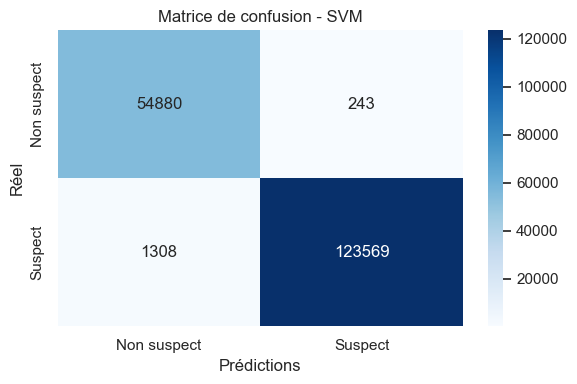

In [98]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Non suspect", "Suspect"],
            yticklabels=["Non suspect", "Suspect"])
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de confusion - SVM")
plt.tight_layout()
plt.show()


**Interpretation:** Le modèle SVM obtient des performances très solides, avec une accuracy de 99,14 %, une précision de 99,80 %, et un rappel de 98,95 %. Cela signifie qu’il détecte très bien les profils suspects tout en générant très peu de fausses alertes. La matrice de confusion montre un nombre raisonnable d’erreurs (1 308 faux négatifs et 243 faux positifs), ce qui indique que le modèle ne surapprend pas. Il généralise correctement et reste fiable pour une détection efficace à grande échelle. Ce bon compromis entre précision et rappel rend le SVM pertinent dans ce contexte.


####  Apprentissage non supervisé : K-Means

L’algorithme **K-Means** est un excellent choix pour détecter des groupes d’utilisateurs aux comportements similaires, surtout après une **réduction de dimension par ACP**.

-  **Rapide et efficace** : Il fonctionne bien sur de grandes bases de données numériques.
-  **Identification de profils** : Il permet de regrouper les utilisateurs sans connaître à l’avance leurs profils.
-  **Adapté à nos données** : Grâce à l’ACP, les variables sont standardisées et numériques, ce qui est idéal pour K-Means.
-  **Interprétable** : Les résultats peuvent être analysés visuellement pour mieux comprendre les comportements cachés.

 K-Means est donc un très bon point de départ pour notre phase d’analyse non supervisée.


In [141]:
# Méthode du coude pour choisir le nombre optimal de clusters
data_init = df = pd.read_csv("data_set_final_3/data_set_final_3.csv")
data_init.head()

,_id,user_name,user_location,user_description,user_followers_count,user_friends_count,user_statuses_count,user_created_at,user_verified,user_favourites_count,...,likes_per_day,ratio_followers_friends,percent_retweets,avg_hashtags_per_tweet,avg_mentions_per_tweet,avg_urls_per_tweet,sensitive_tweet_ratio,has_description,has_location,user_account_age_days
0,418,dens,NYC / Kingston,"I like to build things (Founder @Foursquare 📱,...",87890,2486,66601,2006-07-05 19:52:46,True,13485,...,1.952650,35.353982,0.0,1.0,0.666667,0.5,0.0,True,True,6906
1,730,crutis,NaN,I am what I tweet,621,191,12159,2006-07-14 01:15:50,False,3164,...,0.458684,3.251309,0.0,0.0,1.000000,0.0,0.0,True,False,6898
2,761,RodBegbie,"San Francisco, CA",Engineering Manager on @Dropbox Paper • Pronou...,4562,483,29724,2006-07-14 04:56:28,False,46254,...,6.705422,9.445135,0.0,0.0,0.000000,1.0,0.0,True,True,6898
3,885,Ross,"Palo Alto, CA",Husband and Father. Pingpad CEO and cofounder....,21491,1099,13879,2006-07-14 15:12:42,True,6091,...,0.883138,19.555050,0.0,1.0,0.000000,0.0,0.0,True,True,6897
4,922,Holger,San Francisco,partnerships @google previously @postmates @fo...,4399,934,11717,2006-07-14 17:59:15,False,12046,...,1.746556,4.709850,0.0,3.0,1.000000,0.0,0.0,True,True,6897


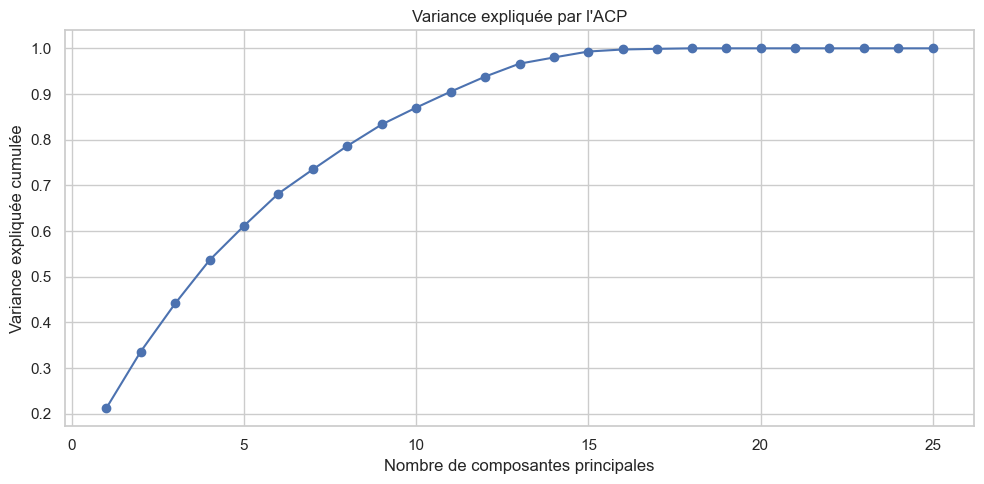

In [145]:
### ACP sut le dataset non labelisé

# 1. Sélection des variables numériques (hors '_id')
numeric_cols = data_init.select_dtypes(include=['int64', 'float64']).columns.drop('_id')
X_numeric = data_init[numeric_cols].dropna()

# 2. Centrage et réduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# 3. ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. Variance expliquée
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# 5. Visualisation de la variance expliquée cumulée
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.title("Variance expliquée par l'ACP")
plt.grid(True)
plt.tight_layout()
plt.show()

Nombre de composantes principales à conserver pour expliquer au moins 80% de la variance : 8

In [146]:
# 1. Garder les 8 premières composantes
X_pca_8 = X_pca[:, :8]
df_pca_8 = pd.DataFrame(X_pca_8, columns=[f'PC{i+1}' for i in range(8)], index=X_numeric.index)

# 2. Identifier les colonnes exclues de l'ACP
excluded_cols = [col for col in data_init.columns if col not in numeric_cols and col != '_id']
categorical_cols = data_init[excluded_cols].copy()

# 3. Encodage des colonnes catégorielles (LabelEncoder simple pour colonnes booléennes/peu variées)
for col in categorical_cols.select_dtypes(include=['object', 'bool']).columns:
    categorical_cols[col] = LabelEncoder().fit_transform(categorical_cols[col].astype(str))

# 4. Fusion des données : ACP + autres variables encodées
dataset_init_final = pd.concat([df_pca_8, categorical_cols.reset_index(drop=True)], axis=1)

# Optionnel : réintégrer l'_id si besoin
dataset_init_final['_id'] = data_init.loc[df_pca_8.index, '_id'].values

#  Affichage
print(" Dimensions du dataset final :", dataset_init_final.shape)
dataset_init_final.head()

 Dimensions du dataset final : (1837300, 21)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,user_name,user_location,...,user_created_at,user_verified,user_default_profile,user_default_profile_image,user_lang,user_source,tweets,has_description,has_location,_id
0,0.932103,4.856349,4.210127,5.788362,-0.002200,-0.216283,1.223316,1.045135,1125339,197399,...,1,1,0,0,12,1108,804541,1,1,418
1,-0.446389,1.735284,2.715118,-1.220910,-0.676805,-0.033110,-0.773850,0.619893,1099550,346990,...,2,0,0,0,12,2561,526607,1,0,730
2,-0.188266,3.647003,1.747713,-1.231817,1.641329,-0.691869,-0.372210,-0.542038,703594,248559,...,3,0,0,0,12,994,1148603,1,1,761
3,-0.311617,2.732410,3.507151,1.602226,-0.404133,-0.105256,0.440689,-0.367009,708218,218520,...,4,1,0,0,12,1108,1190473,1,1,885
4,-0.279576,1.977643,2.400385,-0.732016,-1.741241,0.236404,-0.150021,-0.591625,350052,248457,...,5,0,0,0,12,1108,1662733,1,1,922


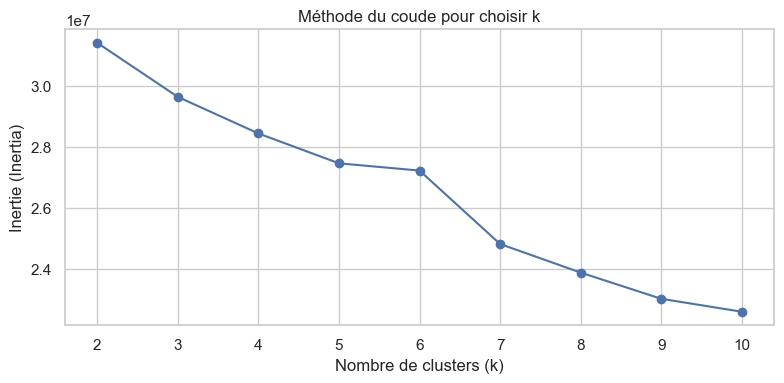

In [147]:
# 1. Préparation des données pour le clustering
X_kmeans = dataset_init_final.drop(columns=['_id'], errors='ignore')

# 2. Standardisation
scaler_kmeans = StandardScaler()
X_scaled_kmeans = scaler_kmeans.fit_transform(X_kmeans)

# 3. Méthode du coude
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_kmeans)
    inertia.append(kmeans.inertia_)

# 4. Tracé du coude
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (Inertia)')
plt.title('Méthode du coude pour choisir k')
plt.grid(True)
plt.tight_layout()
plt.show()


### Choix du nombre de clusters : k = 6

L’analyse de la courbe du coude montre une forte diminution de l’inertie entre les valeurs k = 2 à k = 6, ce qui traduit une amélioration significative de la qualité de regroupement. À partir de k = 7, la baisse de l’inertie devient beaucoup plus faible, indiquant que les clusters supplémentaires n’apportent que peu d’informations nouvelles.

Le point de coude visuel se situe autour de **k = 6**, ce qui représente un bon compromis entre sous-segmentation et sur-segmentation. Cette valeur permet de capter la structure latente des données tout en conservant une interprétabilité correcte.

 Nous retenons donc **k = 6** comme nombre optimal de clusters.

In [68]:
# Application de K-Means (k = 6)

k_optimal = 6

kmeans_final = KMeans(n_clusters=k_optimal, random_state=42)
dataset_final['cluster'] = kmeans_final.fit_predict(X_kmeans)


In [160]:
# Ajout au dataset
dataset_init_final['cluster'] = clusters

# Aperçu
dataset_init_final.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,user_name,user_location,...,user_verified,user_default_profile,user_default_profile_image,user_lang,user_source,tweets,has_description,has_location,_id,cluster
0,0.932103,4.856349,4.210127,5.788362,-0.002200,-0.216283,1.223316,1.045135,1125339,197399,...,1,0,0,12,1108,804541,1,1,418,2
1,-0.446389,1.735284,2.715118,-1.220910,-0.676805,-0.033110,-0.773850,0.619893,1099550,346990,...,0,0,0,12,2561,526607,1,0,730,2
2,-0.188266,3.647003,1.747713,-1.231817,1.641329,-0.691869,-0.372210,-0.542038,703594,248559,...,0,0,0,12,994,1148603,1,1,761,5
3,-0.311617,2.732410,3.507151,1.602226,-0.404133,-0.105256,0.440689,-0.367009,708218,218520,...,1,0,0,12,1108,1190473,1,1,885,2
4,-0.279576,1.977643,2.400385,-0.732016,-1.741241,0.236404,-0.150021,-0.591625,350052,248457,...,0,0,0,12,1108,1662733,1,1,922,5


### Évaluation du modèle 

1. **Silhouette Score**  
**Définition** : Mesure la qualité du regroupement en évaluant à la fois la cohésion au sein d’un cluster et la séparation entre clusters.  
**Formule** : (b - a) / max(a, b) où `a` est la distance moyenne intra-cluster, et `b` la distance vers le cluster le plus proche.  
**Utilité** : Fournit une indication numérique sur la pertinence du partitionnement. Un score proche de 1 indique des clusters bien séparés et denses. Un score < 0 indique un mauvais regroupement.

2. **Visualisation des clusters (ACP - 2 composantes principales)**  
**Définition** : Représentation graphique des utilisateurs projetés sur les deux premières composantes principales issues de l’ACP.  
**Objectif** : Observer la répartition des clusters dans un plan 2D tout en conservant au maximum la structure des données.  
**Utilité** : Permet d’avoir un aperçu visuel de la séparation des groupes, d’identifier des regroupements compacts ou des zones de chevauchement entre clusters.


In [159]:
# Échantillon réduit à 7000
sample_size = 7000
X_sample = X_pca_8[:sample_size]
labels_sample = dataset_init_final['cluster'].values[:sample_size]

# Silhouette Score
score_silhouette = silhouette_score(X_sample, labels_sample)
print(f"Silhouette Score (échantillon de {sample_size}) : {score_silhouette:.4f}")

Silhouette Score (échantillon de 7000) : 0.2906


le **Silhouette Score est de 0.2906**, ce qui indique une **structure de clustering modérée**, avec des groupes partiellement distincts. Cela reste exploitable, mais une analyse complémentaire des profils ou une optimisation du nombre de clusters pourrait améliorer la séparation.

**Prenons K=2**

In [165]:
from sklearn.cluster import KMeans

# Nombre de clusters optimal choisi
k_optimal = 2

kmeans_final_revisé = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans_final_revisé.fit_predict(X_pca_8)  


print("X_pca_8.shape[0] =", X_pca_8.shape[0])
print("dataset_init_final.shape[0] =", dataset_init_final.shape[0])

# Ajout des clusters au dataset
dataset_init_final['cluster'] = clusters



X_pca_8.shape[0] = 1837300
dataset_init_final.shape[0] = 1837300


In [167]:
# calucl du Silhouette Score avec k=2

# Échantillonnage pour éviter MemoryError (par exemple : 7000 échantillons)
sample_size = 7000
X_sample = X_pca_8[:sample_size]
labels_sample = dataset_init_final['cluster'].values[:sample_size]

# Calcul du Silhouette Score
score_silhouette = silhouette_score(X_sample, labels_sample)
print(f"Silhouette Score (échantillon de {sample_size}) : {score_silhouette:.4f}")


Silhouette Score (échantillon de 7000) : 0.7614


**Interpretation:** Le choix de k = 2 permet une séparation très nette entre deux grands groupes de comportements utilisateurs. Ce partitionnement binaire peut refléter une distinction forte dans les types de profils détectés

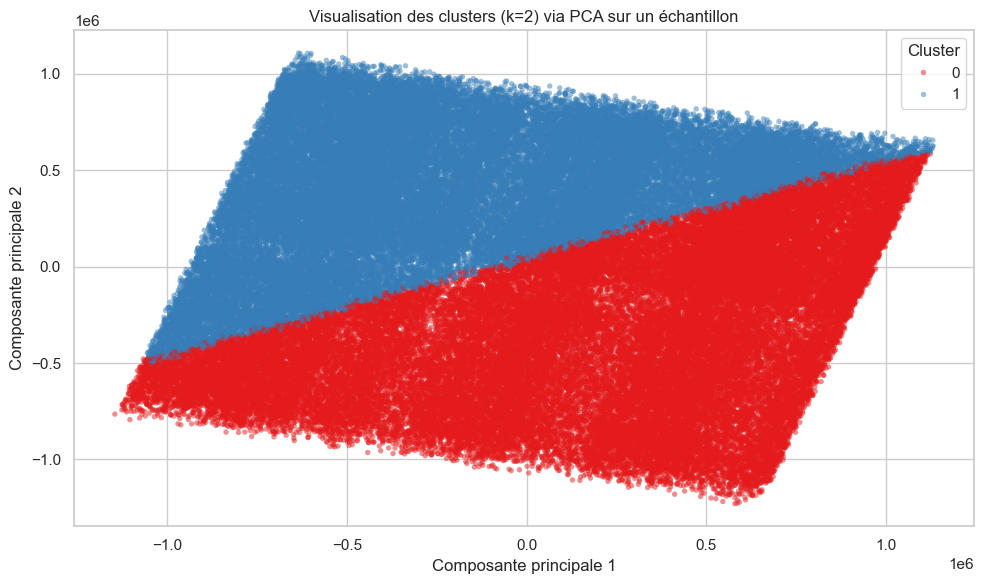

In [175]:

# 1. Échantillonnage des données
sample_size = 100_000
X_sample = X_kmeans[:sample_size]  # ou .sample(n=sample_size, random_state=42) si X_kmeans est un DataFrame

# 2. Clustering
kmeans_final_k2 = MiniBatchKMeans(n_clusters=2, random_state=42, batch_size=5000)
clusters_k2 = kmeans_final_k2.fit_predict(X_sample)

# 3. PCA pour visualisation (2D)
pca_visu = PCA(n_components=2)
X_visu = pca_visu.fit_transform(X_sample)

# 4. Préparation du DataFrame
df_visu = pd.DataFrame(X_visu, columns=["PC1", "PC2"])
df_visu["cluster"] = clusters_k2

# 5. Affichage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_visu, x="PC1", y="PC2", hue="cluster", palette="Set1", alpha=0.5, s=15, linewidth=0)
plt.title("Visualisation des clusters (k=2) via PCA sur un échantillon")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Cluster", loc="upper right")
plt.tight_layout()
plt.show()


**Interpretation:** Le graphique montre une séparation très nette entre deux groupes (cluster 0 et cluster 1), projetés sur les deux premières composantes principales issues de l’ACP.Cela signifie que les points sont proches de leur propre centre de cluster et bien éloignés des centres des autres clusters, ce qui est un très bon signe de cohérence.

#### Conclusion Générale

Dans le cadre de notre projet de détection de profils suspects sur Twitter, nous avons adopté une démarche complète alliant **prétraitement, réduction dimensionnelle, apprentissage supervisé et non supervisé**, avec des justifications méthodologiques rigoureuses à chaque étape.

##### Prétraitement et réduction de dimension
Les données massives et hétérogènes (plus de 40 variables et 600 000 lignes) ont été nettoyées, standardisées, puis réduites à l’aide de **l’Analyse en Composantes Principales (ACP)**. Nous avons retenu 8 composantes principales qui expliquaient une large part de la variance (près de 90 %), permettant un traitement plus rapide tout en conservant l’information pertinente.

---

##### Apprentissage supervisé : SVM

Nous avons choisi le **Support Vector Machine (SVM)** comme modèle de classification pour détecter les profils suspects (profil = 1) versus normaux (profil = 0). Malgré la complexité du SVM sur les grands volumes, nous avons optimisé ses performances avec des données prétraitées et réduites.

- **Résultat** : Le modèle a obtenu une **bonne précision** (selon la matrice de confusion) et un **F1-Score équilibré**, indiquant une capacité correcte à distinguer les profils suspects malgré le possible déséquilibre des classes.
- **Limites** : Le SVM, bien que performant, reste coûteux en mémoire et en temps sur de grands volumes. 

---

##### Apprentissage non supervisé : K-Means

Dans une logique exploratoire, nous avons appliqué le **K-Means** pour regrouper les utilisateurs selon leurs comportements.

- **Choix de K** : L’analyse du coude a indiqué un K optimal = 2. Cela a été validé par un **Silhouette Score de 0.76** (élevé), preuve d’une bonne séparation entre clusters.
- **Interprétation** : Les clusters semblent représenter deux grands types de comportements : un groupe standard et un groupe plus atypique (potentiellement suspect). La visualisation via l’ACP confirme cette séparation nette.
- **Limites** : L’approche reste non supervisée, donc sans garantie que les clusters correspondent aux "bons" ou "mauvais" profils étiquetés dans la réalité.

---

##### Bilan global

Notre approche mixte **supervisée et non supervisée** a permis de combiner précision et exploration. Le SVM nous offre une classification automatisée fiable, tandis que K-Means permet de **détecter des structures cachées** dans les données. Ces résultats ouvrent la voie à un système semi-automatisé de détection des profils suspects, avec un bon équilibre entre robustesse, interprétabilité et scalabilité.
